# Initial Try:

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("ClusterAnalysis.csv")

In [5]:
df.head()

,hotel_country,topic_label,clean_reviews,percentage,Cluster
0,9Brick_Hotel,0,1,5.0,8
1,9Brick_Hotel,1,1,5.0,8
2,9Brick_Hotel,2,4,20.0,5
3,9Brick_Hotel,3,0,0.0,7
4,9Brick_Hotel,4,1,5.0,8


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

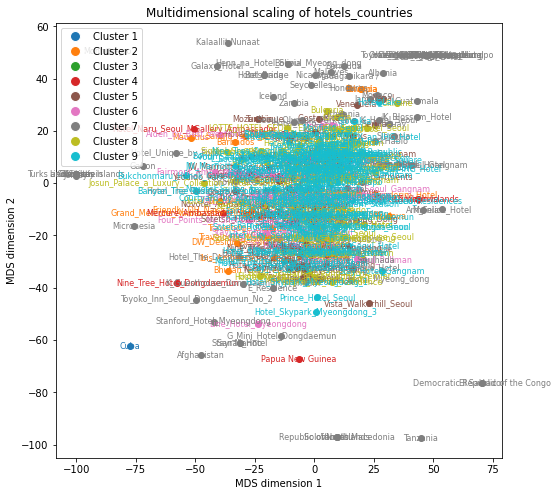

In [9]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# load the dataset
df = pd.read_csv("ClusterAnalysis.csv")

# extract the relevant columns
X = df.pivot(index='hotel_country', columns='topic_label', values='percentage').fillna(0).values
hotel_names = df['hotel_country'].unique()
y = df.groupby('hotel_country')['Cluster'].first().values

# perform multidimensional scaling
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# plot the results
fig, ax = plt.subplots(figsize=(8, 8))

# define a color map for the clusters
cmap = plt.cm.get_cmap('tab10', 9)

# loop over the clusters and plot the hotels with the same color
for i in range(1, 10):
    mask = (y == i)
    ax.scatter(X_mds[mask, 0], X_mds[mask, 1], label=f'Cluster {i}', c=cmap(i-1))

    # annotate the hotel names with the corresponding cluster color
    for j in np.where(mask)[0]:
        ax.annotate(hotel_names[j], xy=(X_mds[j, 0], X_mds[j, 1]), ha='center', va='center',
                    fontsize=8, color=cmap(i-1))

# add labels and legend
ax.set_xlabel('MDS dimension 1')
ax.set_ylabel('MDS dimension 2')
ax.set_title('Multidimensional scaling of hotels_countries')
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markerfacecolor=cmap(i-1), markersize=10)
                   for i in range(1, 10)]
ax.legend(handles=legend_elements)

# show the plot
plt.show()


### Since the visulaization is not at all clear, we decided to just see the most represenative countries/hotels of each cluster.

In [27]:
import pandas as pd

# Load the data into a Pandas dataframe
df = pd.read_csv("ClusterAnalysis.csv")

# Group the data by cluster and hotel/country, and calculate the mean percentage per topic label
grouped = df.groupby(['Cluster', 'hotel_country', 'topic_label'])['percentage'].mean().reset_index()

# Sort the data by cluster and percentage, and select the top 10 hotels/countries per cluster
top_hotels = grouped.sort_values(['Cluster', 'percentage'], ascending=[True, False]).groupby('Cluster').head(10)

# Print the top 10 hotels/countries per cluster
for cluster in range(1, 10):
    cluster_hotels = top_hotels[top_hotels['Cluster'] == cluster]['hotel_country'].unique()[:10]
    print(f"Cluster {cluster}: {', '.join(cluster_hotels)}")


Cluster 1: Algeria, Antigua and Barbuda, Belarus, Belau, Burkina Faso, Cameroon, Central African Republic, Cuba, Democratic Republic of the Congo, El Salvador
Cluster 2: Hotel_President, New Zealand, Josun_Palace_a_Luxury_Collection_Hotel_Seoul_Gangnam, The_Westin_Josun_Seoul, Hotel_URI, Turkey, Rosana_Boutique_Hotel, Sunbee_Hotel, Gangnam_Artnouveau_City_II, Qatar
Cluster 3: Guatemala, Albania, Ukraine, Hotel_Lake, JK_Blossom_Hotel, Monaco, Nepal, Jamaica, Uruguay, Slovenia
Cluster 4: Hotel_ParkHabio, WD_Hotel, Hotel_Kobos, Estonia, Hotel_Naru_Seoul_MGallery_Ambassador, Hotel_Unique_by_Foret, Slovakia, Youngbin_Hotel, Italy, Bahrain
Cluster 5: Signiel_Seoul, Hotel_Atrium_Jong_No, JW_Marriott_Dongdaemun_Square_Seoul, L7_HONGDAE, Sofitel_Ambassador_Seoul_Hotel_Serviced_Residences, Taiwan, Grand_Hyatt_Seoul_Hotel, Staz_Hotel_Myeongdong_II, Solaria_Nishitetsu_Hotel_Seoul_Myeong_dong
Cluster 6: Courtyard_by_Marriott_Seoul_Namdaemun, Hotel_Gracery_Seoul, L_Escape_Hotel, Rosana_Boutique_Hote